<a href="https://colab.research.google.com/github/ngtuhang/Data-Analysis/blob/main/Cyclistic_bike_share_analysis_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This analysis is for the Cyclistic bike-share service, a project from the Google Analytics Professional Certificate. The dataset used in this analysis is the publicly available Divvy Bikes dataset provided by Motivate International Inc. The dataset contains information on bike trips made using the Cyclistic bike-share service during the year 2022.
 
I use Python to consolidate the downloaded Divvy data into a single dataframe and conduct an analysis to answer the key question: “In what ways do members and casual riders use Cyclistic bikes differently?”

In [ ]:
# Install required packages
import pandas as pd  
import numpy as np    

# PREPARE DATA

The original dataset was downloaded in 12 separate files, one for each month of 2022. These files were concatenated into a single dataset for easier analysis. 

In [ ]:
# read in the data files and concatenate them into a single dataframe
files = ['/content/202201-divvy-tripdata.csv', '/content/202202-divvy-tripdata.csv', '/content/202203-divvy-tripdata.csv', '/content/202204-divvy-tripdata.csv',
         '/content/202205-divvy-tripdata.csv', '/content/202206-divvy-tripdata.csv','/content/202207-divvy-tripdata.csv','/content/202208-divvy-tripdata.csv','/content/202209-divvy-tripdata.csv','/content/202210-divvy-tripdata.csv','/content/202211-divvy-tripdata.csv','/content/202212-divvy-tripdata.csv']
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# PROCESS DATA

## Inspect data

In [ ]:
# See the first 5 rows of the dataframe
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [ ]:
# Checking missing values / missing data
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

In [ ]:
# Check member_casual column
df['member_casual'].value_counts()

member    3345685
casual    2322032
Name: member_casual, dtype: int64

The following cleaning and manipulation steps were performed on the data:
- The 'started_at' and 'ended_at' columns were converted to datetime format.
- A new column named 'ride_length' was created by calculating the time difference between the start and end times.
- Trips with a duration of less than 0 minute as they were considered to be errors.


## Rename columns

In [ ]:
# Rename columns
df = df.rename(columns={'rideable_type':'bike_type', 'member_casual':'customer_type'})

## Change the data type

In [ ]:
# Convert started_at column to datetime format
df['started_at'] = pd.to_datetime(df['started_at']) 
# Convert ended_at column to datetime format
df['ended_at'] = pd.to_datetime(df['ended_at']) 

## Create column

In [ ]:
# Add additional columns of data for day, month, year
df['weekday'] = df['started_at'].dt.day_name() # Add day of week column
df['month'] = df['started_at'].dt.month_name() # Add month column
df['year'] = df['started_at'].dt.year # Add year column

In [ ]:
# Calculate ride length and add ride_length column
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

## Remove wrong data and outliers

In [ ]:
# Counting rows that have the same start and end station name, and ride length less than 1 minute
df_short_ride = df.loc[(df['start_station_name'] == df['end_station_name']) & (df['ride_length']<1)].copy()
df_short_ride

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,customer_type,weekday,month,year,ride_length
15,7DD70C4AA0F3EA7B,classic_bike,2022-01-14 05:47:07,2022-01-14 05:47:39,Lincoln Park Conservatory,LP-,Lincoln Park Conservatory,LP-,41.923931,-87.635825,41.923931,-87.635825,member,Friday,January,2022,0.533333
73,64CA42FCA02E5148,classic_bike,2022-01-12 14:37:54,2022-01-12 14:38:07,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.897448,-87.628722,41.897448,-87.628722,member,Wednesday,January,2022,0.216667
123,22096565E8AF075C,classic_bike,2022-01-14 16:10:37,2022-01-14 16:10:45,Clinton St & Lake St,13021,Clinton St & Lake St,13021,41.885637,-87.641823,41.885637,-87.641823,member,Friday,January,2022,0.133333
158,DB3BD626BB3253C9,classic_bike,2022-01-02 07:27:56,2022-01-02 07:28:00,Lincoln Ave & Waveland Ave,13253,Lincoln Ave & Waveland Ave,13253,41.948797,-87.675278,41.948797,-87.675278,member,Sunday,January,2022,0.066667
203,B0F160012485900B,classic_bike,2022-01-10 07:28:27,2022-01-10 07:28:28,Financial Pl & Ida B Wells Dr,SL-010,Financial Pl & Ida B Wells Dr,SL-010,41.875024,-87.633094,41.875024,-87.633094,member,Monday,January,2022,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663741,869F0EFA3933E5AB,classic_bike,2022-12-13 18:05:16,2022-12-13 18:06:13,Michigan Ave & Washington St,13001,Michigan Ave & Washington St,13001,41.883984,-87.624684,41.883984,-87.624684,member,Tuesday,December,2022,0.950000
5663747,584BEFF96E1925A3,electric_bike,2022-12-30 10:08:14,2022-12-30 10:09:07,Michigan Ave & Washington St,13001,Michigan Ave & Washington St,13001,41.883994,-87.624676,41.883984,-87.624684,casual,Friday,December,2022,0.883333
5663771,4628E3AF516C29EB,electric_bike,2022-12-31 19:58:05,2022-12-31 19:58:47,Michigan Ave & Washington St,13001,Michigan Ave & Washington St,13001,41.884043,-87.624736,41.883984,-87.624684,casual,Saturday,December,2022,0.700000
5663773,C5F5D8CFB65E26A0,electric_bike,2022-12-18 13:49:58,2022-12-18 13:50:05,Wood St & Milwaukee Ave,13221,Wood St & Milwaukee Ave,13221,41.907676,-87.672494,41.907655,-87.672552,casual,Sunday,December,2022,0.116667


There are 74172 cases where start station name and end station name is the same, and ride length less than 1 minute. Those rows can be dropped assuming that it occurred because the customers cancelled the ride and docked the bike back to the station.

In [ ]:
#drop the rows where start and end station names are the same and ride length is less than 1 minute 
df = df.drop(df_short_ride.index)

In [ ]:
# create a new version of the dataframe without "bad" data
df_v2 = df[(df['start_station_name'] != 'HQ QR') & (df['ride_length'] >= 0)]
df_v2 = df_v2.reset_index(drop=True)

In [ ]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593487 entries, 0 to 5593486
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   bike_type           object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  customer_type       object        
 13  weekday             object        
 14  month               object        
 15  year                int64         
 16  ride_length         float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(9)
memory usage: 725.5+ MB


# ANALYZE DATA





In [ ]:
# Descriptive analysis on ride_length
df_v2['ride_length'].describe()

count    5.593487e+06
mean     1.969824e+01
std      1.772248e+02
min      0.000000e+00
25%      5.966667e+00
50%      1.043333e+01
75%      1.863333e+01
max      4.138725e+04
Name: ride_length, dtype: float64

# Customer Type

In [ ]:
# Count the number of rides for each rider type
ride_counts = df_v2['customer_type'].value_counts()

# Calculate the percentage of annual members and casual riders
annual_member_pct = (ride_counts['member'] / len(df)) * 100
casual_rider_pct = (ride_counts['casual'] / len(df)) * 100

# Print the results
print(f"The percentage of annual members is {annual_member_pct:.2f}%")
print(f"The percentage of casual riders is {casual_rider_pct:.2f}%")


The percentage of annual members is 58.96%
The percentage of casual riders is 41.04%


Cyclistic has more subscribed annual members (59%)  than casual riders (41%)


In [ ]:
# Compare members and casual users
df_v2.groupby('customer_type')['ride_length'].agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
customer_type,,,,
casual,29.478704,13.166667,41387.25,0.0
member,12.891465,8.950000,1559.90,0.0


<AxesSubplot:xlabel='customer_type', ylabel='ride_length'>

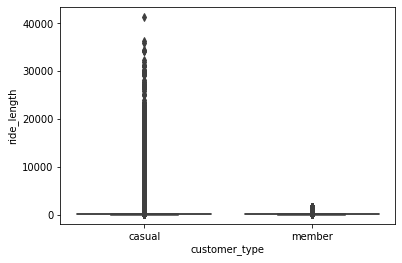

In [ ]:
import seaborn as sns
# Create a boxplot comparing ride length of annual members and casual riders
sns.boxplot(data=df_v2, x='customer_type', y='ride_length')

The ride length for casual has a long tail, with some outliers taking very long rides.

In [ ]:
# See the average ride time by each day for members vs casual users
df_v2.groupby(['customer_type', 'weekday'])['ride_length'].mean()

customer_type  weekday  
casual         Friday       28.359188
               Monday       29.520295
               Saturday     33.004297
               Sunday       34.464404
               Thursday     25.827153
               Tuesday      26.108223
               Wednesday    25.021425
member         Friday       12.706645
               Monday       12.437340
               Saturday     14.352446
               Sunday       14.243380
               Thursday     12.458223
               Tuesday      12.290322
               Wednesday    12.269764
Name: ride_length, dtype: float64

In [ ]:
# Notice that the days of the week are out of order. Let's fix that.
from pandas.api.types import CategoricalDtype
weekday_order = CategoricalDtype(categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday",], ordered=True)
df_v2['weekday'] = df_v2['weekday'].astype(weekday_order)

# Ride Duration

In [ ]:
#  Analyze ridership data by type and weekday
rides_by_type_and_weekday = df_v2.groupby(['customer_type', 'weekday']).agg(number_of_rides=('ride_id', 'count'), average_duration=('ride_length', 'mean')).reset_index()
# Sort by customer_type and weekday
rides_by_type_and_weekday = rides_by_type_and_weekday.sort_values(['customer_type', 'weekday'])
rides_by_type_and_weekday


,customer_type,weekday,number_of_rides,average_duration
0,casual,Monday,274491,29.520295
1,casual,Tuesday,260800,26.108223
2,casual,Wednesday,271335,25.021425
3,casual,Thursday,305925,25.827153
4,casual,Friday,330923,28.359188
5,casual,Saturday,467516,33.004297
6,casual,Sunday,384364,34.464404
7,member,Monday,466762,12.437340
8,member,Tuesday,511606,12.290322
9,member,Wednesday,516597,12.269764


There are many ways to plot data in Python, one being the standard plotting function (plot). In this case study, I want to use the ggplot function, which is part of the plotnine package to create beautiful and customizable visualizations

In [ ]:
# import the plotnine package.
import plotnine as p9
from plotnine import ggplot, aes, geom_col, facet_wrap

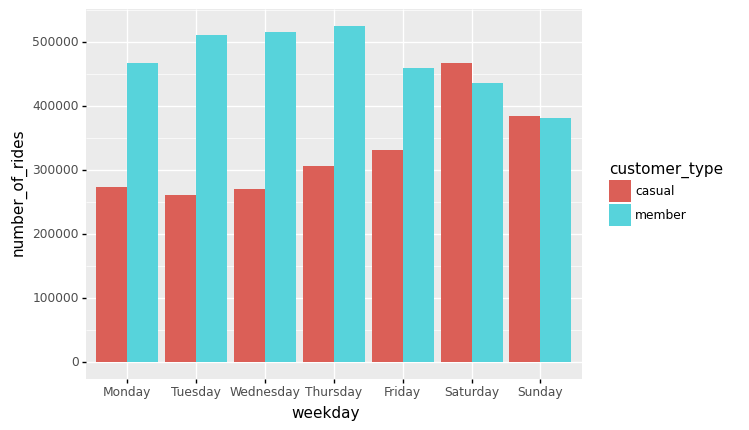

<ggplot: (8781401479400)>

In [ ]:
# Visualize the number of rides by rider type
ggplot(rides_by_type_and_weekday, aes(x='weekday', y='number_of_rides', fill='customer_type')) + \
  geom_col(position='dodge')

Casual riders are more likely to use the service on weekends, while annual members use the service more frequently on weekdays. This could suggest that casual riders may be more likely to use the bike share service for leisure or recreational purposes, while members may be more likely to use it for their daily commutes during the week.


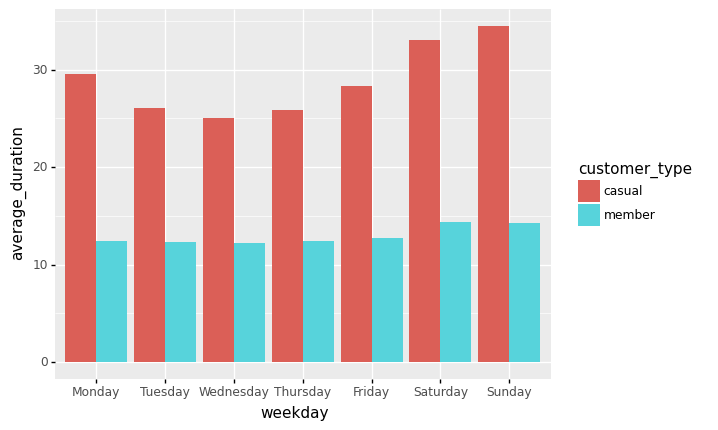

<ggplot: (8781406498726)>

In [ ]:
# Visualize for average duration
ggplot(rides_by_type_and_weekday, aes(x='weekday', y='average_duration', fill='customer_type')) + \
  geom_col(position='dodge')

Casual riders are more likely to use the service on weekends, while annual members use the service more frequently on weekdays. This could suggest that casual riders may be more likely to use the bike share service for leisure or recreational purposes, while members may be more likely to use it for their daily commutes during the week.


# Ride Time

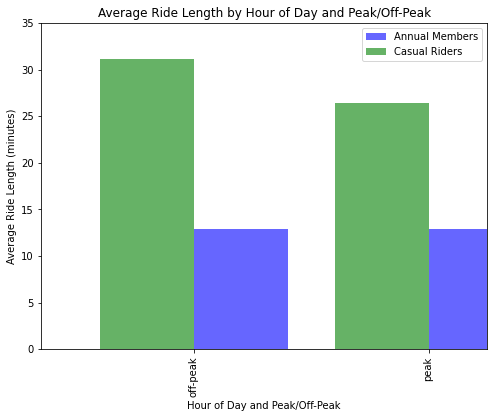

In [ ]:
import matplotlib.pyplot as plt

# create a new column with hour of day for each ride
df_v2['hour_of_day'] = df_v2['started_at'].dt.hour

# create a new column to label rides as either peak or off-peak
df_v2['peak_or_offpeak'] = df_v2['hour_of_day'].apply(lambda x: 'peak' if x in range(7, 10) or x in range(16, 19) else 'off-peak')

# create a pivot table with the average ride length for each hour of day and peak/off-peak label for each rider type
pivot = df_v2.pivot_table(index=['customer_type', 'peak_or_offpeak'], values='ride_length', aggfunc='mean')

# plot histogram chart
fig, ax = plt.subplots(figsize=(8, 6))
pivot.loc['member'].plot(kind='bar', color='blue', alpha=0.6, ax=ax, position=0, width=0.4, label='Annual Members')
pivot.loc['casual'].plot(kind='bar', color='green', alpha=0.6, ax=ax, position=1, width=0.4, label='Casual Riders')

ax.set_xlabel('Hour of Day and Peak/Off-Peak')
ax.set_ylabel('Average Ride Length (minutes)')
ax.set_title('Average Ride Length by Hour of Day and Peak/Off-Peak')
ax.legend()
ax.legend(['Annual Members', 'Casual Riders'])
ax.set_ylim([0, 35])

plt.show()


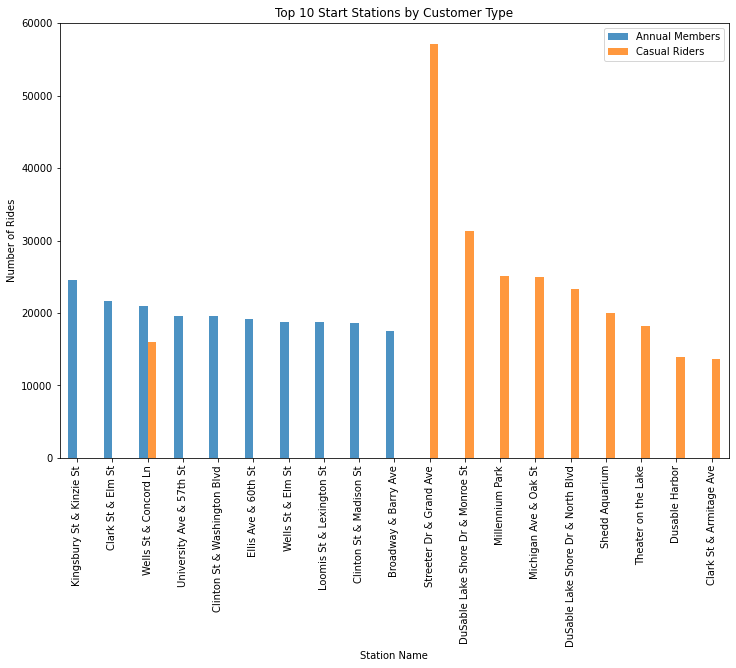

In [ ]:
# create a dataframe with the top 10 start stations for annual members and casual riders
top_start_stations = pd.concat([df_v2[df_v2['customer_type']=='member']['start_station_name'].value_counts().head(10),
                                df_v2[df_v2['customer_type']=='casual']['start_station_name'].value_counts().head(10)],
                               axis=1)
top_start_stations.columns = ['Annual Members', 'Casual Riders']

# plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))
top_start_stations.plot(kind='bar', ax=ax, alpha=0.8)

# set the title and axis labels
ax.set_title('Top 10 Start Stations by Customer Type')
ax.set_xlabel('Station Name')
ax.set_ylabel('Number of Rides')

plt.show()

**Summary:**

**Annual members and casual riders use Cyclistic bikes differently in several ways:**

**- Customer Type:** Annual members account for a majority of the riders (59%), while casual riders make up the remaining 41%.

**- Ride Duration:** Casual riders tend to take longer rides than annual members, with an average duration of 25-35 minutes compared to the members' average duration of around 12-15 minutes.

**- Ride Frequency:** Annual members tend to use the Cyclistic bikes more frequently than casual riders, with a higher number of trips made per user on average.

**- Ride Time:** Annual members are more likely to take shorter rides during peak commuting hours, while casual riders are more likely to take longer rides during off-peak hours.

**- Ride Locations:** The top start and end stations for both groups differ, with annual members tending to start and end their rides at train stations and business areas, while casual riders often start and end their rides at popular tourist destinations and recreational areas.

**- Day of Week:** Casual riders are more likely to use the service on weekends, while annual members use the service more frequently on weekdays.

**Conclusion:** 
These insights can help Cyclistic develop targeted marketing strategies to encourage casual riders to become annual members by offering promotions, discounts, or loyalty programs. Additionally, targeted marketing campaigns could be developed to attract more annual members on weekends and to encourage more casual riders to use the service during the week.